<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Longest_Balanced_Substring_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Longest Balanced Substring

Write a function that takes in a string made up of parentheses (`(` and `)`). The function should return an integer representing the length of the longest balanced substring with regards to parentheses.

A string is said to be balanced if it has as many opening parentheses as it has closing parentheses and if no parenthesis is unmatched. Note that an opening parenthesis can't match a closing parenthesis that comes before it, and similarly, a closing parenthesis can't match an opening parenthesis that comes after it.

Sample Input

```
string = "(()))("
```



Sample Output

```
4 // The longest balanced substring is "(())".
```



# Solution 1: Brute Force

In [1]:
# Time = O(n^3)
# Space = O(n)

def longestBalancedSubstring(string):
  max_length = 0
  for i in range(len(string)):
    for j in range(i + 2, len(string) + 1, 2):
      if is_balance(string[i:j]):
        current_length = j - i
        max_length = max(max_length, current_length)
  return max_length

def is_balance(string):
  open_stack = []
  for char in string:
    if char == '(':
      open_stack.append('(')
    elif len(open_stack) > 0:
      open_stack.pop()
    else:
      return False
  return len(open_stack) == 0

In [2]:
string = "(()))("
longestBalancedSubstring(string)

4

## Conceptual Note

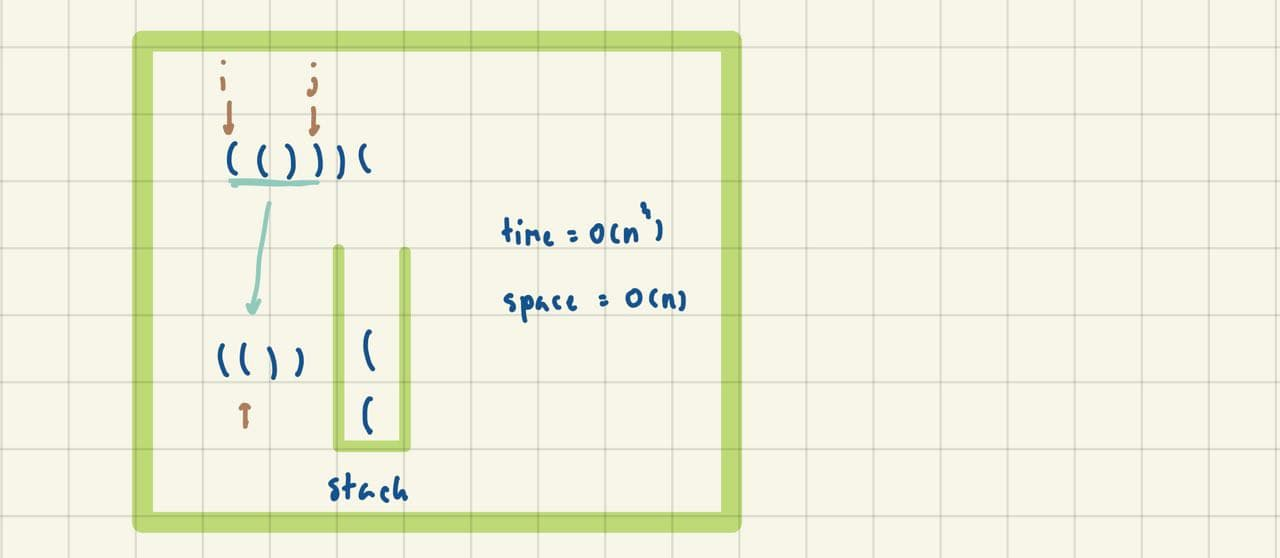

# Solution 2: stack

In [3]:
# Time = O(n)
# Space = O(n)


def longestBalancedSubstring(string):
	max_length = 0
	idx_stack = [-1]

	for i in range(len(string)):
		if string[i] == '(':
			idx_stack.append(i)
		else:
			idx_stack.pop()
			if len(idx_stack) == 0:
				idx_stack.append(i)
			else:
				balanced_substring_start_idx = idx_stack[-1]
				current_lenght = i - balanced_substring_start_idx
				max_length = max(max_length, current_lenght)

	return max_length

In [4]:
string = "(()))("
longestBalancedSubstring(string)

4

In [5]:
string = "(((()))()())))(()()()())()()"
longestBalancedSubstring(string)

14

## Conceptual Note

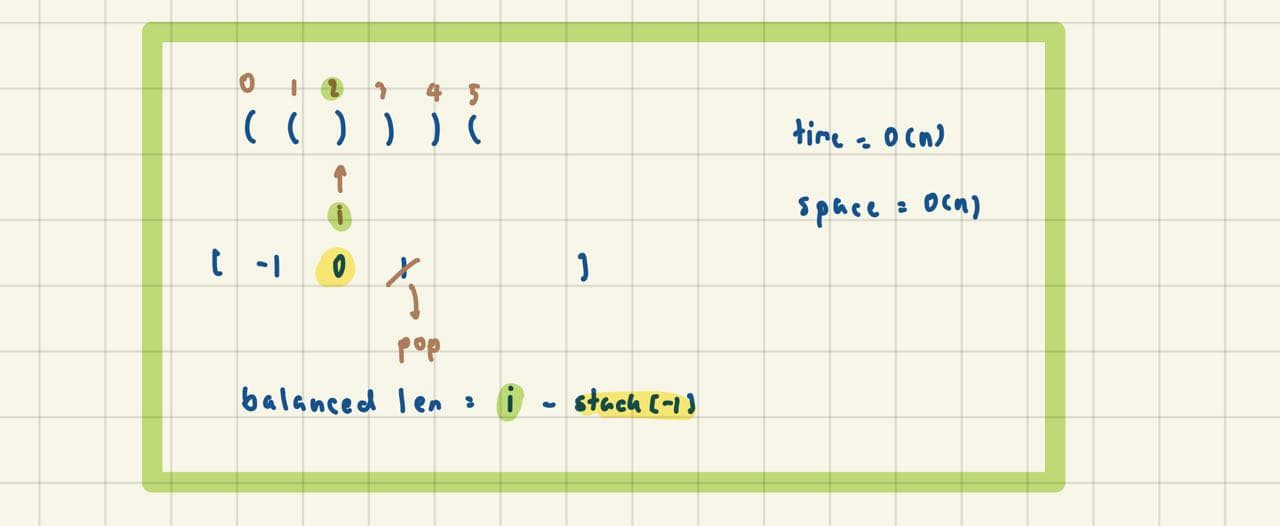

# Solution 3: traverse 2 directions

In [6]:
# Time O(n)
# Space O(1)


def longestBalancedSubstring(string):
	return max(get_longest_balanced_substring_in_direction(string, True),
		get_longest_balanced_substring_in_direction(string, False))

def get_longest_balanced_substring_in_direction(string, left_to_right):
	opening = '(' if left_to_right else ')'
	start_idx = 0 if left_to_right else len(string) - 1
	step = 1 if left_to_right else -1

	max_length = 0
	opening_count, closing_count = 0, 0

	idx = start_idx
	while idx >= 0 and idx < len(string):
		if string[idx] == opening:
			opening_count += 1
		else:
			closing_count += 1

		if opening_count == closing_count:
			max_length = max(max_length, closing_count * 2)
		elif closing_count > opening_count:
			opening_count, closing_count = 0, 0
		
		idx += step
	return max_length

In [7]:
string = "(()))("
longestBalancedSubstring(string)

4

In [8]:
string = "(((()))()())))(()()()())()()"
longestBalancedSubstring(string)

14

## Conceptual Note

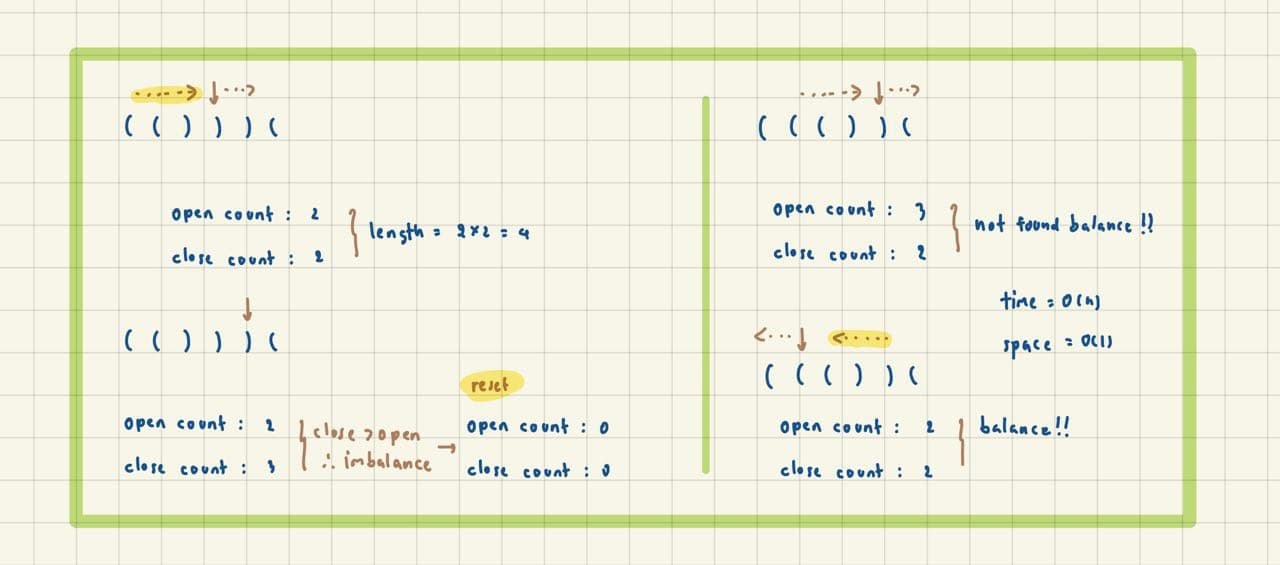